In [1]:
import os, sys,  warnings

current_path = os.path.abspath('.')
parent_path = os.path.dirname(current_path)

sys.path.append(parent_path)
os.environ.setdefault('DJANGO_SETTINGS_MODULE', 'child.settings')

from pandas.core.common import SettingWithCopyWarning
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=SettingWithCopyWarning)

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from OptionPricing import Payoff
import AmericanOptions as AO
import matplotlib.pyplot as plt

Na początek zdefiniujmy parametry dla przykładowej opcji call z metodą biorącą pod uwagę tylko trajektorie "in the money"

In [3]:
r = 0.05
K = 100
s0 = 98
sigma = 0.2
T = 1
N = 10000
M = 100
d = 3
call = True
itm = True

In [4]:
ao = AO.AmericanOptions(T, N, M, d, call)

In [5]:
example = ao.pricingOption(r, K, s0, sigma, T, N, M, d, call, itm)

Pokazujemy wycenę opcji oraz RMSE

In [6]:
example

[2.137881780062508, 0.03349929872647525]

Przedstawimy wyniki wyceny w zależności od parametru d określającego stopień wielomianu

In [7]:
d_ = [i for i in range(2, 15)]

In [8]:
results_d = {}
for deg in d_:
    results_d[deg] = ao.pricingOption(r, K, s0, sigma, T, N, M, deg, call, itm)

Wykres ceny w zależności od stopnia wielomianu. Dla małych stopni wielomianu (robiłem symulację kilka razy), zawsze wychodza wyniki bardzo niewielkie w porównaniu z większymi stopniami wielomianu. Różnice są też dosyć spore.

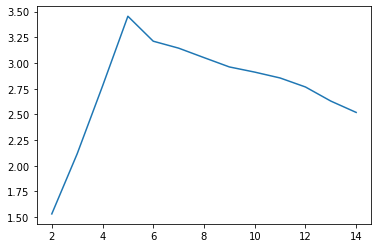

In [9]:
plt.plot(list(results_d.keys()), [i[0] for i in results_d.values()])

Wykres RMSE w zależności od stopnia wielomianu

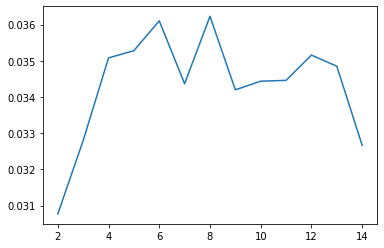

In [10]:
plt.plot(list(results_d.keys()), [i[1] for i in results_d.values()])

Spróbujemy wyznaczyć cenę opcji amerykańskiej z uzyciem wszystkich trajektorii w zależności od parametru N

In [23]:
N_ = range(1000, 50000, 2000)

In [24]:
results_n = {}
for n in N_:
    results_n[n] = ao.pricingOption(r, K, s0, sigma, T, n, M, d, call, False)

Tutaj widzimy już jaśniejszą zbieżność do pewnej ceny oraz zdecydowanie malejący błąd estymacji.

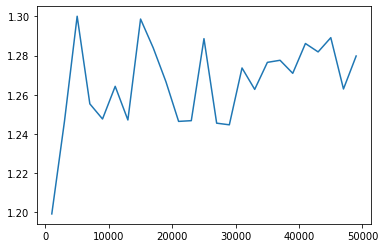

In [25]:
plt.plot(list(results_n.keys()), [i[0] for i in results_n.values()])

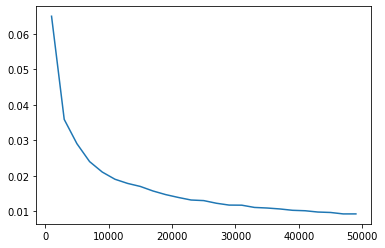

In [26]:
plt.plot(list(results_n.keys()), [i[1] for i in results_n.values()])

Zbadamy cenę i RMSE w zależności od liczby momentów realizacji

In [19]:
M_ = [k for k in range(20, 1000, 20)]

In [20]:
results_M = {}
for Mm in M_:
    results_M[Mm] = ao.pricingOption(r, K, s0, sigma, T, N, Mm, d, call, itm)

Nie do końca wiem, dlaczego wychodzi taka mocna zbieżność do 0. Wraz ze wzrostem M cena powinna wzrastać, ponieważ mamy więcej możliwości wykonania opcji.

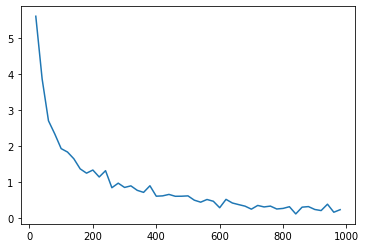

In [21]:
plt.plot(list(results_M.keys()), [i[0] for i in results_M.values()])

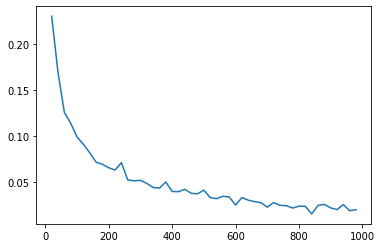

In [22]:
plt.plot(list(results_M.keys()), [i[1] for i in results_M.values()])